In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [3]:
def IndOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]
#a=[3,4,6,2]
#print IndOfSortedFea(a)

In [4]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        rf.fit(x[train],y[train])
        prediction=rf.predict(x[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [22]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    x_kpca=kpca.fit_transform(x)
    
    xT=np.concatenate((x,x_kpca),axis=1)
    
#     rank=[]
    numOfFeatures=xT.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(xT[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [88]:
def layer_rbf_c(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    x_kpca=kpca.fit_transform(x)
    
    xT=np.concatenate((x,x_kpca),axis=1)
    
#     rank=[]
    numOfFeatures=xT.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(xT[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
#     dif =[]
#     for i in xrange(numOfFeatures-1):
#         dif.append(featureSelectedErrors[i+1]-featureSelectedErrors[i])
#     choice=featureSelectedErrors.index(min(featureSelectedErrors))
    choice=selectChoice(featureSelectedErrors)
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [108]:
def selectChoice(featureSelectedErrors):
    """
    return a index of given error return a index of which
    trend of increasing or decreasing is minimum
    """
    dif =[]
    numOfFeatures=len(featureSelectedErrors)
    for i in xrange(numOfFeatures-1):
        dif.append(featureSelectedErrors[i+1]-featureSelectedErrors[i])
    dif=np.abs(dif)
# choice=dif.index(min(dif))+1
    choice=0
    for i in xrange(len(dif)):
        if dif[i]<0.001:
            choice=i
            break
        else:
            choice=i
    return choice


In [23]:
def pretrain(x,y):
    
    numOfFeatures=x.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(x[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(x[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return x[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()

In [8]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x[y == t,i],x[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [9]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [10]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i
        print 

In [11]:
# iris=load_iris()
# x=iris.data
# y=iris.target

In [124]:
digits=load_digits()
x=digits.data
y=digits.target

In [125]:
result,error,cm=pretrain(x,y)
printCM(cm)

[[36  0  0  0  1  0  0  0  1  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  2 31  0  1  0  0  1  2]
 [ 1  1  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  1  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  1  0  0  0  0 36  1  0]
 [ 0  2  1  0  0  0  1  1 30  1]
 [ 0  0  0  0  0  0  0  0  2 34]]

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  2  0  0  0  0  0  0  0]
 [ 1  0 28  1  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  3  0]
 [ 0  2  0  0 31  0  0  0  1  0]
 [ 0  0  0  1  0 32  0  0  0  0]
 [ 0  0  0  0  1  0 39  0  0  0]
 [ 0  0  0  0  1  0  0 45  0  0]
 [ 0  3  1  0  0  1  0  0 27  0]
 [ 0  0  0  0  1  0  0  0  1 25]]

[[29  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  1  0 30  0  3  0  0  0  0]
 [ 0  0  0  0 32  2  0  2  0  2]
 [ 0  0  0  0  0 25  1  0  0  0]
 [ 0  1  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  2 37  0]
 [ 0  0  0  1  0  1  0  0  1 38]]

[[39

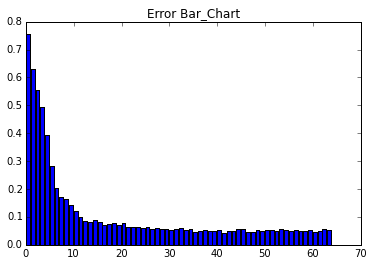

Choice of Error:  0.0484122562674


In [127]:
plotErr(error)
print "Choice of Error: ", error[result.shape[1]]

In [128]:
print result.shape

(1797L, 42L)


In [129]:
result1,e1,cm1=layer_rbf(result,y)
printCM(cm1)

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 37  1  0  0  0  0  0  0  0]
 [ 0  0 35  2  0  0  0  0  0  0]
 [ 0  0  0 33  0  2  0  0  1  1]
 [ 0  1  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  1 38  0  0  0  2]
 [ 0  1  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  2  0  0  0  0  1 22  0]
 [ 0  0  0  0  0  0  0  1  1 28]]

[[37  0  0  0  1  0  0  0  1  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 1  0 31  1  0  0  0  0  0  0]
 [ 0  1  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 1  0  0  1  0 24  1  0  0  2]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  1  0  0  0  0  0 31  1]
 [ 1  0  0  0  0  1  0  0  2 33]]

[[24  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 31  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  1  5]
 [ 1  1  0  0 34  1  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 38  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 2  0  0  1  1  1  0  1  0 35]]

[[34

In [130]:
print result1.shape

(1797L, 42L)


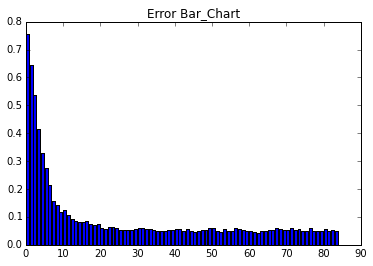

0.0506391210152


In [132]:
plotErr(e1)
print e1[result1.shape[1]]

In [133]:
result2,e2,cm2=layer_rbf(result1,y)
printCM(cm2)

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  1  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  0  1  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  1  0  1  0 35  0  0  1  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  2 35]]

[[32  0  0  0  0  1  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  1  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 1  0  0  0  1 33  0  0  0  1]
 [ 0  2  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  0  0  0  1  0  0  1 34  0]
 [ 0  1  0  1  1  1  0  0  1 34]]

[[26  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 1  1 33  0  0  0  0  0  0  0]
 [ 0  1  0 39  0  0  0  0  2  1]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  1  0 39  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  0  0  0  1  0  0 25  2]
 [ 0  1  0  1  0  0  0  0  1 30]]

[[42

In [134]:
print result2.shape

(1797L, 42L)


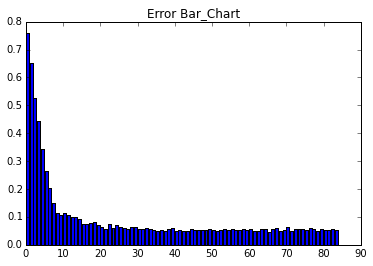

0.0512086041473


In [137]:
plotErr(e2)
print e2[result2.shape[1]]

In [138]:
result3,e3,cm3=layer_rbf(result2,y)
printCM(cm3)

[[33  0  0  0  0  0  0  0  1  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  1 33  2  0  0  0  0  1  0]
 [ 0  0  0 40  0  1  0  0  0  1]
 [ 0  2  0  0 38  0  0  2  1  0]
 [ 0  0  0  0  0 35  0  0  0  3]
 [ 0  0  0  0  1  0 37  0  1  0]
 [ 0  0  0  1  0  0  0 34  0  0]
 [ 0  2  1  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0  5  1 25]]

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  1  2  0]
 [ 1  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  1 38  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  2  1  0  0  0  0  2 27  0]
 [ 0  2  0  2  0  0  0  1  1 34]]

[[29  0  0  0  0  1  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  2  0]
 [ 0  0  0  0 33  1  0  0  0  0]
 [ 0  0  0  0  3 34  1  0  0  0]
 [ 0  0  0  0  2  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  1  0  0  1  0  2 37  1]
 [ 0  0  0  0  0  1  0  0  2 31]]

[[33

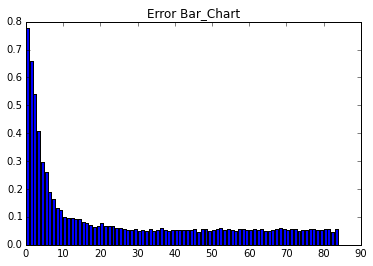

0.0528597957289


In [139]:
plotErr(e3)
print e3[result3.shape[1]]

In [140]:
print result3.shape

(1797L, 42L)


In [141]:
result4,e4,cm4=layer_rbf(result3,y)
printCM(cm4)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  1  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  0  0  0  0 30  0  0  0  1]
 [ 1  1  0  0  1  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 42  0  0]
 [ 0  1  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  0  0  2  2 33]]

[[29  0  0  0  0  1  0  0  0  0]
 [ 0 47  1  0  1  0  0  0  0  0]
 [ 0  0 29  0  0  0  1  0  0  0]
 [ 0  0  2 32  0  0  0  0  1  2]
 [ 0  1  0  0 39  0  0  0  0  1]
 [ 0  0  0  1  0 30  0  0  0  3]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  1  0  0 34  0  1]
 [ 1  1  1  0  0  0  0  0 32  0]
 [ 0  0  0  2  0  0  0  1  1 25]]

[[36  0  0  0  0  0  0  0  1  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 1  1 31  0  0  0  0  0  0  0]
 [ 0  1  0 30  0  0  0  0  3  0]
 [ 0  2  0  1 32  1  0  2  0  0]
 [ 0  0  0  1  1 34  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  1  0  0  0 37  0  1]
 [ 0  3  3  0  0  1  1  0 26  0]
 [ 0  0  0  1  0  0  0  0  0 36]]

[[41

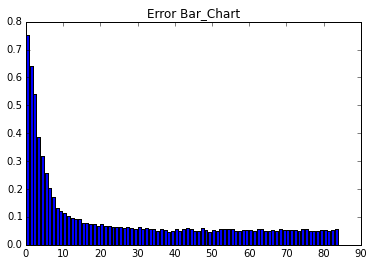

0.0562039616218


In [142]:
plotErr(e4)
print e4[result4.shape[1]]

In [143]:
print result4.shape

(1797L, 42L)


In [144]:
result5,e5,cm5=layer_rbf(result4,y)
printCM(cm5)

[[35  0  0  0  0  1  0  0  0  0]
 [ 0 34  0  1  0  0  0  0  2  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  1  0  2]
 [ 0  1  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  1]
 [ 0  0  0  1  1  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  2  0 35]]

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  1  0  0  0  0  0  1]
 [ 0  3 31  0  0  1  0  0  0  0]
 [ 0  1  0 37  0  1  0  0  2  1]
 [ 0  0  0  0 30  1  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  2]
 [ 0  0  0  0  1  0 30  0  0  0]
 [ 0  0  0  0  0  1  0 47  0  2]
 [ 0  4  0  0  0  1  0  0 30  1]
 [ 0  0  0  0  0  0  0  1  2 38]]

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  1  0  0  0  0  0  0  0]
 [ 1  1 45  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  1  0 39  0  0  0  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  1  1  0  0 24  1  2]
 [ 0  1  4  0  0  0  0  0 18  2]
 [ 0  1  0  2  0  0  0  0  1 30]]

[[39

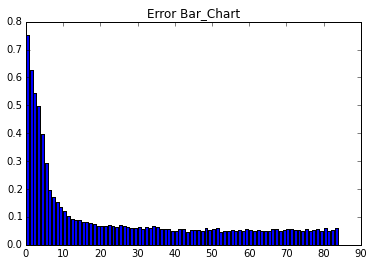

0.0572965026308


In [145]:
plotErr(e5)
print e5[result5.shape[1]]

In [146]:
print result5.shape

(1797L, 42L)


In [84]:
digits=load_digits()
x=digits.data
y=digits.target

In [85]:
result,error,cm=pretrain(x,y)
printCM(cm)

[[25  0  0  0  1  0  0  0  1  0]
 [ 0 43  0  0  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  1  0  0  0]
 [ 0  1  0  0 35  0  0  0  0  1]
 [ 1  0  0  0  0 43  0  0  0  0]
 [ 1  1  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  1 34  0]
 [ 1  0  0  2  1  0  0  1  2 25]]

[[45  0  0  0  1  0  0  0  0  0]
 [ 0 24  0  2  0  0  0  0  0  0]
 [ 1  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  2  0]
 [ 0  0  0  0 39  0  0  1  0  0]
 [ 0  0  0  2  0 34  0  0  0  2]
 [ 0  1  0  0  1  0 31  0  0  0]
 [ 0  0  0  0  1  0  0 31  1  0]
 [ 0  1  0  0  0  0  0  1 23  1]
 [ 0  0  0  1  0  0  0  0  0 42]]

[[32  0  0  0  1  0  0  0  1  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  1  0  1  0  0]
 [ 0  0  0 35  0  0  0  0  2  3]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  3  0 33  0  0  0]
 [ 0  0  0  0  2  0  0 31  0  0]
 [ 0  0  0  1  0  0  0  0 41  0]
 [ 1  0  0  1  0  1  0  0  0 36]]

[[38

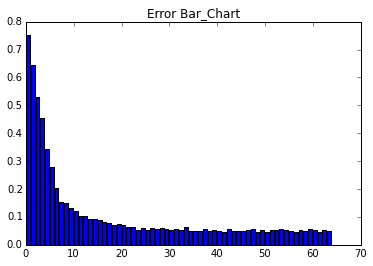

Choice of Error:  0.0545434849892


In [123]:
plotErr(error)
print "Choice of Error: ", error[result.shape[1]]

In [90]:
result1,e1,cm1=layer_rbf_c(result,y)
printCM(cm1)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 31  1  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  1  0  1  0]
 [ 0  2  1 34  0  1  0  0  0  0]
 [ 0  0  0  0 43  1  0  0  0  0]
 [ 1  0  0  0  0 30  0  0  0  2]
 [ 0  1  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  1  1  0  0  0  1 33  0]
 [ 0  0  0  0  1  0  0  2  1 35]]

[[37  0  0  0  3  0  0  0  0  0]
 [ 1 29  0  0  0  0  0  1  0  2]
 [ 0  1 37  0  0  0  0  0  2  0]
 [ 0  0  0 38  0  1  0  0  1  2]
 [ 1  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  1 26  0  0  0  0]
 [ 0  0  0  0  6  0 29  0  1  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  6  0  0  1  0  0  1 35  1]
 [ 0  0  0  0  0  0  0  0  2 28]]

[[35  0  0  0  0  0  0  0  1  0]
 [ 0 42  0  1  0  0  0  0  0  1]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  1  0  0  1  0]
 [ 0  2  0  0 31  0  0  2  0  0]
 [ 0  1  0  0  0 49  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  1  0  0 29  0  0]
 [ 0  1  0  0  0  0  0  0 20  1]
 [ 0  0  0  0  0  0  0  2  2 35]]

[[38

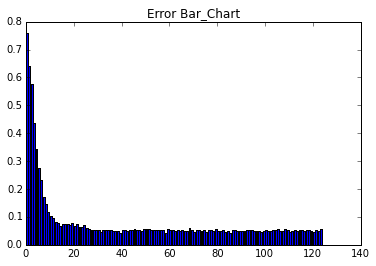

Choice of Error:  0.0756762612194


In [117]:
plotErr(e1)
print "Choice of Error: ", e1[result1.shape[1]]

In [92]:
print result1.shape

(1797L, 16L)


In [93]:
result2,e2,cm2=layer_rbf_c(result1,y)
printCM(cm2)

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  1  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  1  0]
 [ 0  1  2 26  0  2  0  1  6  1]
 [ 1  1  0  0 38  0  1  0  0  1]
 [ 0  0  0  0  0 38  1  0  0  1]
 [ 0  1  0  0  1  0 31  1  0  0]
 [ 0  0  0  0  1  0  0 33  0  1]
 [ 0  2  1  0  0  1  0  0 20  0]
 [ 0  0  1  0  2  0  0  0  1 40]]

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  1  0  0  0  0  1]
 [ 1  1 30  0  0  0  0  1  0  1]
 [ 0  0  1 35  0  0  0  1  1  0]
 [ 0  1  0  0 34  1  0  3  0  0]
 [ 0  1  0  0  1 40  1  0  0  2]
 [ 0  0  0  0  1  1 31  0  1  0]
 [ 0  0  0  0  0  0  0 22  0  0]
 [ 0  1  4  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  2  0 30]]

[[44  0  0  0  0  0  0  0  0  0]
 [ 1 37  0  0  0  0  0  0  0  0]
 [ 0  2 34  0  0  0  0  0  1  0]
 [ 0  0  0 29  0  0  0  0  1  2]
 [ 0  0  0  0 32  1  0  0  0  1]
 [ 0  0  0  0  0 31  0  0  0  2]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  2  0  0 43  0  0]
 [ 0  0  0  1  0  0  1  2 21  0]
 [ 0  0  0  3  0  1  0  1  1 23]]

[[29

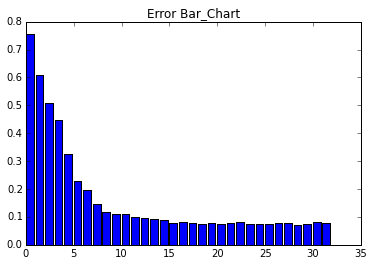

Choice of Error:  0.0801284432064


In [118]:
plotErr(e2)
print "Choice of Error: ", e2[result2.shape[1]]

In [95]:
print result2.shape

(1797L, 16L)


In [96]:
result3,e3,cm3=layer_rbf_c(result2,y)
printCM(cm3)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  2  0  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  1  0]
 [ 0  1  2 34  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  3  0  0]
 [ 0  0  0  0  1 32  1  0  0  4]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 1  3  4  0  0  0  0  0 28  0]
 [ 0  0  1  1  0  1  0  1  1 35]]

[[44  0  0  0  0  0  0  0  1  0]
 [ 0 42  1  0  0  0  0  0  0  2]
 [ 0  0 30  1  0  0  0  0  0  1]
 [ 0  1  1 34  0  0  0  0  1  1]
 [ 0  0  0  0 36  1  0  1  0  0]
 [ 0  1  0  1  0 36  0  0  0  1]
 [ 0  1  0  0  1  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  0  0  0  0  0 25  1]
 [ 0  1  0  0  0  0  0  2  0 25]]

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  1 35  0  0  0  0  1  2  0]
 [ 0  0  1 28  0  1  0  0  1  2]
 [ 0  1  0  0 26  1  0  1  0  0]
 [ 0  0  0  0  1 34  0  0  1  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  2  0  0 38  0  1]
 [ 0  0  0  0  0  1  0  0 34  1]
 [ 0  0  0  2  4  0  0  2  1 35]]

[[40

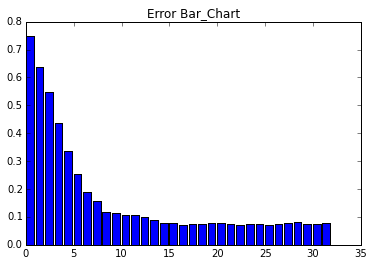

Choice of Error:  0.0773413803776


In [119]:
plotErr(e3)
print "Choice of Error: ", e3[result3.shape[1]]

In [98]:
print result3.shape

(1797L, 15L)


In [99]:
result4,e4,cm4=layer_rbf_c(result3,y)
printCM(cm4)

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 30  1  0  0  0  0  1  3  1]
 [ 0  0 31  0  0  0  2  1  1  2]
 [ 0  0  0 34  0  0  0  2  5  1]
 [ 0  0  0  0 42  0  0  1  0  0]
 [ 0  0  0  0  1 35  1  0  0  0]
 [ 0  0  0  0  1  1 26  0  0  0]
 [ 0  0  0  0  2  0  0 33  0  0]
 [ 0  1  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  2 32]]

[[39  0  0  0  0  0  0  0  1  0]
 [ 0 29  0  0  1  0  0  0  0  2]
 [ 1  0 28  0  0  1  0  0  1  0]
 [ 0  0  1 35  0  1  0  0  1  2]
 [ 1  0  0  0 31  2  0  0  0  0]
 [ 0  1  0  0  0 36  0  0  0  2]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  2  0  0  0  0  0 31  0]
 [ 0  1  0  1  0  0  0  0  0 38]]

[[25  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  1  0  0  0  0  1]
 [ 0  1 36  0  0  0  0  0  1  0]
 [ 0  1  0 34  0  1  0  1  1  0]
 [ 0  2  0  0 36  0  3  3  0  0]
 [ 0  0  0  0  0 29  0  0  2  2]
 [ 0  0  0  0  1  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  1]
 [ 1  2  3  1  0  0  0  0 25  3]
 [ 0  0  1  1  0  1  0  0  1 28]]

[[36

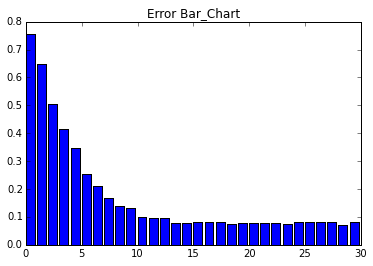

Choice of Error:  0.0784586815227


In [120]:
plotErr(e4)
print "Choice of Error: ", e4[result4.shape[1]]

In [101]:
print result4.shape

(1797L, 14L)


In [102]:
result5,e5,cm5=layer_rbf_c(result4,y)
printCM(cm5)

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  0  3  0]
 [ 0  1 29  0  0  0  1  1  0  0]
 [ 0  0  0 31  0  0  0  0  0  1]
 [ 1  1  0  0 30  0  0  1  0  0]
 [ 0  0  0  1  1 37  1  1  0  0]
 [ 0  1  0  0  1  1 30  0  0  0]
 [ 0  0  0  0  0  1  0 45  0  0]
 [ 2  2  2  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  0 31]]

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  2  0  1  0  0  0  3]
 [ 0  2 28  0  0  0  0  0  1  0]
 [ 0  2  1 31  0  1  0  0  0  2]
 [ 0  0  0  0 45  1  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  0  3]
 [ 0  0  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  1  2  2  0  0  0  1 26  1]
 [ 0  1  0  0  0  1  0  1  0 30]]

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  1  1  0  0  0  1  0]
 [ 0  1 30  1  0  1  0  0  1  0]
 [ 0  1  1 34  0  2  0  1  2  0]
 [ 0  0  0  0 32  1  0  3  0  2]
 [ 0  1  0  0  0 30  0  0  0  0]
 [ 0  1  1  0  1  1 31  0  0  0]
 [ 0  0  0  0  1  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  2  1 34]]

[[38

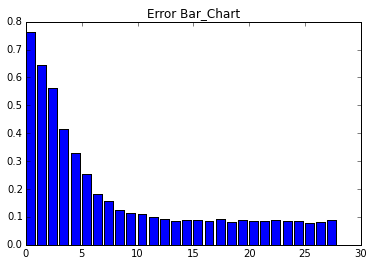

Choice of Error:  0.0901299907149


In [121]:
plotErr(e5)
print "Choice of Error: ", e5[result5.shape[1]]

In [104]:
print result5.shape

(1797L, 14L)


In [109]:
result6,e6,cm6=layer_rbf_c(result5,y)
printCM(cm6)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  1]
 [ 0  3 31  0  0  0  1  2  0  0]
 [ 0  1  1 31  0  0  0  0  0  2]
 [ 0  0  0  0 33  1  0  0  0  0]
 [ 0  1  0  0  0 31  0  0  0  2]
 [ 0  0  0  0  2  0 37  0  0  0]
 [ 0  0  0  0  2  0  0 29  0  1]
 [ 1  2  1  2  0  0  0  0 29  0]
 [ 0  1  0  1  0  0  0  0  0 33]]

[[46  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 1  0 30  1  0  0  0  0  1  0]
 [ 0  2  0 26  0  0  0  0  2  2]
 [ 1  1  0  0 35  0  0  1  0  0]
 [ 0  0  0  1  0 33  1  0  0  1]
 [ 0  0  1  0  1  1 32  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  2  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  1  1 34]]

[[28  0  0  0  0  0  0  0  1  0]
 [ 0 36  0  1  0  0  0  0  0  1]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  1  0  0]
 [ 0  1  0  0 30  0  0  1  0  1]
 [ 0  1  0  1  2 32  0  0  0  0]
 [ 0  0  2  0  0  0 37  0  1  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  0  0  0  1  0  0 27  1]
 [ 0  0  0  2  0  1  0  3  1 36]]

[[32

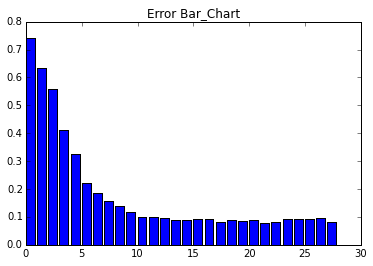

Choice of Error:  0.0873630454968


In [122]:
plotErr(e6)
print "Choice of Error: ", e6[result6.shape[1]]

In [111]:
print result6.shape

(1797L, 14L)
